<a href="https://colab.research.google.com/github/Olive1644/Sales-EDA/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1 Load datasets into DataFrame
from google.colab import files
uploaded = files.upload()

Saving store_sales.csv to store_sales (1).csv


In [ ]:
import pandas as pd

In [ ]:
import io
store_sales=pd.read_csv(io.BytesIO(uploaded['store_sales (1).csv']))

In [ ]:

#2 Display first 5 rows
store_sales.head(5)

,order_id,order_date,customer,state,product,category,unit_price,quantity,discount,payment_method,subtotal,discount_amount,total
0,1001,2024-01-01,Emeka,Kano,Rice 5kg,Groceries,8500,3,0.0,Cash,25500,0.0,25500.0
1,1002,2024-01-03,Aisha,Edo,Phone Charger,Electronics,3500,4,0.0,Transfer,14000,0.0,14000.0
2,1003,2024-01-05,Aisha,Ogun,Soap Bar,Personal Care,700,4,0.0,Cash,2800,0.0,2800.0
3,1004,2024-01-06,Chidi,Kano,Bread Loaf,Bakery,1000,3,0.0,Transfer,3000,0.0,3000.0
4,1005,2024-01-07,Sola,Anambra,Bread Loaf,Bakery,1000,5,0.0,POS,5000,0.0,5000.0


In [ ]:
# Number of rows and columns
rows, cols = store_sales.shape
print("Rows:", rows)
print("Columns:", cols)

Rows: 120
Columns: 18


In [ ]:
# Column names and data types
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         120 non-null    int64         
 1   order_date       120 non-null    object        
 2   customer         120 non-null    object        
 3   state            120 non-null    object        
 4   product          120 non-null    object        
 5   category         120 non-null    object        
 6   unit_price       120 non-null    int64         
 7   quantity         120 non-null    int64         
 8   discount         120 non-null    float64       
 9   payment_method   120 non-null    object        
 10  subtotal         120 non-null    int64         
 11  discount_amount  120 non-null    float64       
 12  total            120 non-null    float64       
 13  vat_7_5          120 non-null    float64       
 14  grand_total      120 non-null    float64  

In [ ]:

#Column data types
print(store_sales.dtypes)

order_id                    int64
order_date                 object
customer                   object
state                      object
product                    object
category                   object
unit_price                  int64
quantity                    int64
discount                  float64
payment_method             object
subtotal                    int64
discount_amount           float64
total                     float64
vat_7_5                   float64
grand_total               float64
date               datetime64[ns]
month                      object
month_num                   int32
dtype: object


In [ ]:

#Check for missing values
print(store_sales.isna().sum())

order_id           0
order_date         0
customer           0
state              0
product            0
category           0
unit_price         0
quantity           0
discount           0
payment_method     0
subtotal           0
discount_amount    0
total              0
vat_7_5            0
grand_total        0
date               0
month              0
month_num          0
dtype: int64


In [ ]:
#Part2-Data Creation and Transformation

#4 Create new column-vat_7_5
store_sales['vat_7_5'] = store_sales['total']*0.075

#5 Create new column-grand_total
store_sales['grand_total'] = store_sales['total'] + store_sales['vat_7_5']

#6 Create column month
   #Convert to datetime type
store_sales["date"] = pd.to_datetime(store_sales["order_date"])

   #Convert to month name
store_sales["month"] = store_sales["date"].dt.month_name()

   #Print month name
print(store_sales["month"])

#7 Convert all columns to upper case in product
store_sales["product"] = store_sales["product"].str.upper()

#8 Replace POS in Payment_method column with Card(POS)
store_sales["payment_method"]= store_sales["payment_method"].replace("POS", "Card(POS)")

0      January
1      January
2      January
3      January
4      January
        ...   
115       July
116       July
117       July
118       July
119       July
Name: month, Length: 120, dtype: object


In [ ]:
#Part3- Selection & LOOPS

#9 select first 10 rows of customer, product and total column
print(store_sales.iloc[0:10, [2,4,12]])

  customer           product    total
0    Emeka          RICE 5KG  25500.0
1    Aisha     PHONE CHARGER  14000.0
2    Aisha          SOAP BAR   2800.0
3    Chidi        BREAD LOAF   3000.0
4     Sola        BREAD LOAF   5000.0
5   Zainab  FLASH DRIVE 32GB  18000.0
6   Fatima          RICE 5KG   8500.0
7   Zainab          SOAP BAR   2800.0
8     Kemi        YAM TUBERS   6000.0
9     Sola          RICE 5KG  34000.0


In [ ]:
#10 print first 5 rows of customer column using for loop

for customer in store_sales["customer"].head():
    print(customer)

Emeka
Aisha
Aisha
Chidi
Sola


In [ ]:
#11 print first 5 rows of product column using while loop
product=store_sales["product"]
i=0
while i<5 and i<len(product):
      print(product[i])
      i += 1

RICE 5KG
PHONE CHARGER
SOAP BAR
BREAD LOAF
BREAD LOAF


In [ ]:
#SORTING,  GROUPING AND AGGREGATION
#12 Sort the dataset by total in descending order and display top 10 biggest order

Total_desc=store_sales['total'].sort_values(ascending = False)
print(Total_desc.head(10))

32     42500.0
9      34000.0
35     34000.0
86     34000.0
116    34000.0
55     25500.0
44     25500.0
0      25500.0
83     24000.0
102    24000.0
Name: total, dtype: float64


In [ ]:
#13 Group data by state and find the total revenue by state

Revenue_by_state=store_sales.groupby('state')['total'].sum()
print(Revenue_by_state)

state
Abuja (FCT)     95850.0
Anambra        113780.0
Edo            148850.0
Enugu          141615.0
Kaduna          82750.0
Kano           128925.0
Lagos           89660.0
Ogun            93405.0
Oyo             76450.0
Rivers          59745.0
Name: total, dtype: float64


In [ ]:
#14 Group data by product and find the total revenue by product
Total_by_product= store_sales.groupby('product')['total'].sum()
Total_by_product.sort_values(ascending=False)

,total
product,
RICE 5KG,294950.0
FLASH DRIVE 32GB,237900.0
PHONE CHARGER,201600.0
BEANS 2KG,117075.0
BREAD LOAF,50600.0
YAM TUBERS,33200.0
MILK 1L,32220.0
SOAP BAR,28945.0
TOOTHPASTE,25600.0


In [ ]:
#15 Top 3 customers by total spend

Top_customers= store_sales.groupby('customer')['total'].sum()
Top_3_customers=Top_customers.sort_values(ascending= False).head(3)
print(Top_3_customers)

customer
Emeka     163750.0
Zainab    153850.0
Aisha     122295.0
Name: total, dtype: float64


In [ ]:
#Part 5- Missing values & Data types
  #Fill any missing discount value with 0.0
store_sales['discount']=store_sales['discount'].fillna(0.0)
print(store_sales.head())

   order_id  order_date customer    state        product       category  \
0      1001  2024-01-01    Emeka     Kano       RICE 5KG      Groceries   
1      1002  2024-01-03    Aisha      Edo  PHONE CHARGER    Electronics   
2      1003  2024-01-05    Aisha     Ogun       SOAP BAR  Personal Care   
3      1004  2024-01-06    Chidi     Kano     BREAD LOAF         Bakery   
4      1005  2024-01-07     Sola  Anambra     BREAD LOAF         Bakery   

   unit_price  quantity  discount payment_method  subtotal  discount_amount  \
0        8500         3       0.0           Cash     25500              0.0   
1        3500         4       0.0       Transfer     14000              0.0   
2         700         4       0.0           Cash      2800              0.0   
3        1000         3       0.0       Transfer      3000              0.0   
4        1000         5       0.0      Card(POS)      5000              0.0   

     total  vat_7_5  grand_total       date    month  
0  25500.0   1912.5

In [ ]:
#17 convert quantity column to integer type
store_sales['quantity']= store_sales['quantity'].astype(int)

In [ ]:
#MERGING DATA
#18 Create a new data frame with columns state and region

# Full Nigeria State → Region mapping
region_map = pd.DataFrame({
    "state": [
        # South West (SW)
        "Lagos", "Ogun", "Oyo", "Osun", "Ondo", "Ekiti",
        # South East (SE)
        "Abia", "Anambra", "Ebonyi", "Enugu", "Imo",
        # South South (SS)
        "Akwa Ibom", "Bayelsa", "Cross River", "Delta", "Edo", "Rivers",
        # North Central (NC)
        "Benue", "Kogi", "Kwara", "Nasarawa", "Niger", "Plateau", "FCT",
        # North East (NE)
        "Adamawa", "Bauchi", "Borno", "Gombe", "Taraba", "Yobe",
        # North West (NW)
        "Jigawa", "Kaduna", "Kano", "Katsina", "Kebbi", "Sokoto", "Zamfara"
    ],
    "region": [
        # South West
        "SW", "SW", "SW", "SW", "SW", "SW",
        # South East
        "SE", "SE", "SE", "SE", "SE",
        # South South
        "SS", "SS", "SS", "SS", "SS", "SS",
        # North Central
        "NC", "NC", "NC", "NC", "NC", "NC", "NC",
        # North East
        "NE", "NE", "NE", "NE", "NE", "NE",
        # North West
        "NW", "NW", "NW", "NW", "NW", "NW", "NW"
    ]
})

#19 Merge with the store_sales DataFrame
Merged_region=pd.merge(store_sales, region_map, how= 'left')
print(Merged_region)

     order_id  order_date customer    state        product       category  \
0        1001  2024-01-01    Emeka     Kano       RICE 5KG      Groceries   
1        1002  2024-01-03    Aisha      Edo  PHONE CHARGER    Electronics   
2        1003  2024-01-05    Aisha     Ogun       SOAP BAR  Personal Care   
3        1004  2024-01-06    Chidi     Kano     BREAD LOAF         Bakery   
4        1005  2024-01-07     Sola  Anambra     BREAD LOAF         Bakery   
..        ...         ...      ...      ...            ...            ...   
115      1116  2024-07-10    Aisha  Anambra     TOOTHPASTE  Personal Care   
116      1117  2024-07-13   Zainab     Ogun       RICE 5KG      Groceries   
117      1118  2024-07-14    Tunde     Kano      BEANS 2KG      Groceries   
118      1119  2024-07-16     Bola    Lagos     YAM TUBERS      Groceries   
119      1120  2024-07-17   Zainab      Edo      BEANS 2KG      Groceries   

     unit_price  quantity  discount payment_method  subtotal  discount_amou

In [ ]:

#20 Overall Total revenue
Total_revenue= store_sales['total'].sum()
print(Total_revenue)

1031030.0


In [ ]:
  #Average Order Value
    #Find number of orders
Number= len(store_sales['total'])
print(Number)

120


In [ ]:

#Divide Total revenue by number of orders
AOV= Total_revenue/Number
print(AOV)

8591.916666666666


In [ ]:
#Number of Unique Customers

Number_of_Unique_Customers= store_sales['customer'].nunique()
print(Number_of_Unique_Customers)

10


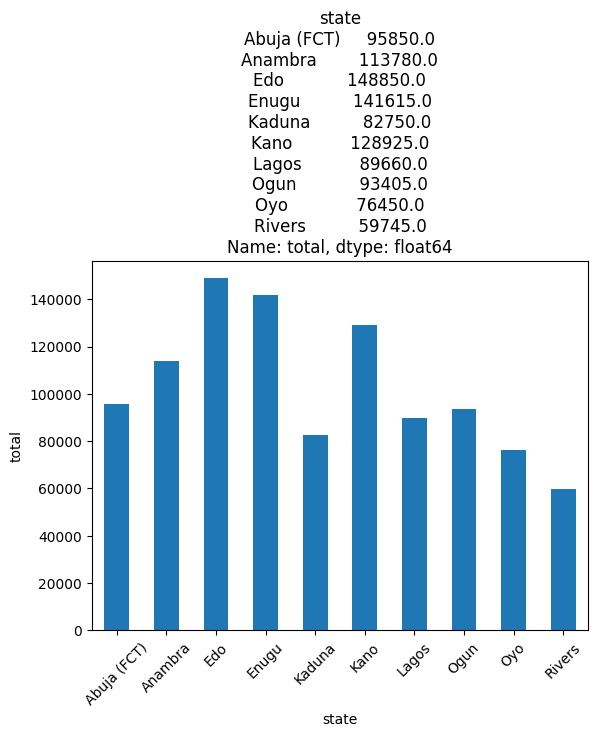

In [ ]:
#PART 8-VISUALIZATION
#21 Bar chart showing total revenue by state
    #import matplotlib for plotting
import matplotlib.pyplot as plt

#plot revenue_by_state on bar chart
Revenue_by_state.plot(x='state', y='total', kind= 'bar')
plt.title(Revenue_by_state)
plt.xlabel('state')
plt.ylabel('total')
plt.xticks(rotation=45) #rotate X label if they overlab
plt.show()

In [ ]:
#22 Line chart showing total revenue by month
#First group total revenue by month
Revenue_by_month= store_sales.groupby('month')['total'].sum()
print(Revenue_by_month)

month
April       118895.0
February    105550.0
January     178860.0
July         95395.0
June        150890.0
March       187610.0
May         193830.0
Name: total, dtype: float64


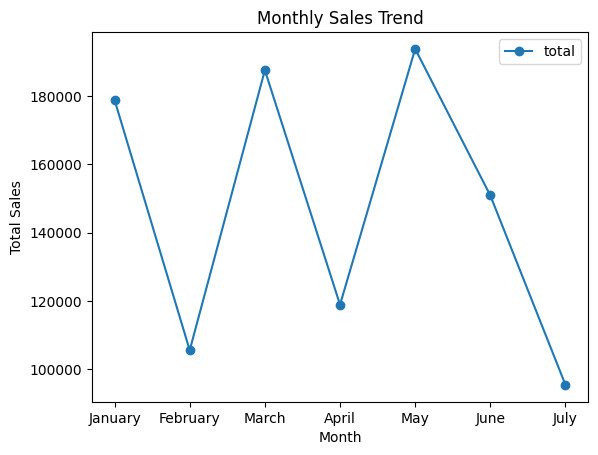

In [ ]:

#22 Line chart showing Monthly Total Revenue
   #Get month number
store_sales["month_num"] = store_sales["date"].dt.month  # numeric month

    # Group total sales by month number and month
monthly_sales = store_sales.groupby(["month_num", "month"])["total"].sum().reset_index()

   # Plot on line chart
monthly_sales.plot(x="month", y="total", kind="line", marker="o")

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

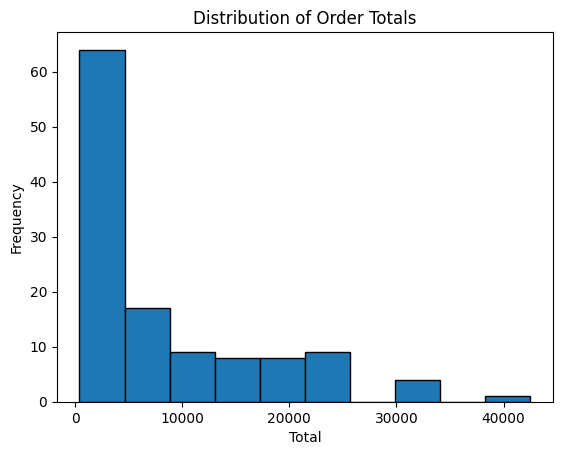

In [ ]:
#23 Histogram showing distribution of order totals

store_sales['total'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Order Totals')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()